<center><h1 style="color:#D4AF37"> ⚡⚡ AEMR Data Analysis ⚡⚡</h1>

<img src = "https://images.squarespace-cdn.com/content/v1/551972d8e4b0d571edc2e2c8/8f3abd33-0916-4415-9b24-593eea1d1e3c/Screen+Shot+2022-04-20+at+12.41.24+PM.png">

  
It’s time for you to apply your budding SQL Competencies to analyse data for the American Energy Market Regulator (AEMR).

The analytics team has supplied you with the following table extract that contains all the data you need to analyse for the `AEMR` outages. 

<li> AEMR_Outage_Table </li> 
    
Now let's revisit the business problem below and understand what we're seeking to solve.

<h1 style="color:#D4AF37"> What's the Business Problem? 💰</h1>

The American Energy Market Regulator (AEMR) is responsible for looking after the
United States of America’s domestic energy network. The regulator’s responsibility is to
ensure that America’s energy network remains reliable with minimal disruptions, which
are known as outages. 

There are four key types of outages:

● Consequential

● Forced 

● Opportunistic 

● Planned 

Recently, the AEMR management team has been increasingly aware of a large number
of energy providers that submitted outages over the 2016 and 2017 calendar years. The
management team has expressed a desire to have the following two areas of concern
addressed:

<b> A) Energy Stability and Market Outages
    <p>
B) Energy Losses and Market Reliability </b>

As an analyst within the data and reporting team, you have been asked to address these
two immediate areas of concern. Feel free to also explore beyond the queries asked and provide additional insights that you feel may be of interest to the management team. 

<h3 style="color:#D4AF37">  SQLite Refresher ⚙️ </h3>

We've pre-loaded the data you need to access in the `AEMR.db` we've included. We'll have you write SQL below where all your SQL queries will be stored in this notebook as a reference you can use when you review your data analysis in Tableau. </b>.

To load the `AEMR.db` file into this notebook, run the below cells.

<b> ⚠️ Please remember that everytime you close this file and re-open this, you'll need to re-run the cells below. ⚠️ </b>

<b>⚠️ Note: Remember, you'll need to start each cell with the **`%%sql`** line, which allows us to execute SQL from within this notebook.</b>

In [1]:
%%capture
!pip install ipython-sql sqlalchemy
import sqlalchemy
sqlalchemy.create_engine("sqlite:///AEMR.db")
%load_ext sql
%sql sqlite:///AEMR.db
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%js
require(['notebook/js/codecell'], function (codecell) {
    codecell.CodeCell.options_default.highlight_modes['magic_text/x-mssql'] = { 'reg': [/%?%sql/] };
    Jupyter.notebook.events.one('kernel_ready.Kernel', function () {
        Jupyter.notebook.get_cells().map(function (cell) {
            if (cell.cell_type == 'code') { cell.auto_highlight(); }
        });
    });
});

<IPython.core.display.Javascript object>

We've included an example of how you would write a query against the database below:

~~~sql
%%sql
SELECT
*
FROM AEMR_Outage_Table
LIMIT 10
~~~

Once you've written your SQL, you'll then need to press `Ctrl` + `Enter` to run the cell.
Otherwise, you can just press `run` at the very top of your screen, to run the specific cell.

For your convenience, we've included a <b style = "color:#5D3FD3"> subset of the answers </b> under the header `Expected Output (Sample)`. These small subsets also include all the `columns` you'll need to include in your Query, so you know what to expect!

Good luck!

<b>PS: In case any of you get stuck regarding how to tackle any of the questions, we've included a breakdown <a href = "https://drive.google.com/file/d/1sXBGV5MZooZ7L38WYyXf9lIaA5sdKL7X/view?usp=share_link"> here</a> where Chris walks through how to tackle each question! Feel free to use this when you're stuck and you can't book a Mentor Call! </b>

<h3 style="color:#D4AF37"> ⚡ Part I. Energy Stability & Market Outages ⚡ </h3>

Energy stability is one of the key themes the AEMR management team cares about. To ensure energy security and reliability, AEMR needs to understand the following:
<p>
<b>

<li> What are the most common outage types and how long do they tend to last? 
<li> How frequently do the outages occur? 
<li> Are there any energy providers which have more outages than their peers which may be indicative of being unreliable? 
    
<p>

<u style="color:Maroon"> Please note that throughout the entire case study, we are interested ONLY in the Outages where Status = Approved. We don't have any interest in Outages that were cancelled or not approved. This means your WHERE Clause will ALWAYS contain the field `Where Status = Approved` </u>

<h3 style="color:#D4AF37"> Question One </h3> 

<b> Write a SQL Statement to `COUNT` the number of valid (i.e. `Status = Approved`) Outage Events sorted by their respective `Outage_Reason` (i.e. `Forced`, `Consequential`, `Scheduled`, `Opportunistic`) over the 2016 & 2017 Periods. </b>

Do we notice anything regarding the trends for specific Outages over the 2016 / 2017 Period?

<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

<b>⚠️ Note: Remember, you'll need to start each cell with the **`%%sql`** line, which allows us to execute SQL from within this notebook.</b>

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


In [3]:
%%sql
SELECT 
COUNT(*) as Total_Number_Outages,
Outage_Reason, 
Year
From AEMR_Outage_Table
WHERE Status = 'Approved'
GROUP BY Outage_Reason, Year

 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Outage_Reason,Year
181,Consequential,2016
127,Consequential,2017
1264,Forced,2016
1622,Forced,2017
106,Opportunistic Maintenance (Planned),2016
102,Opportunistic Maintenance (Planned),2017
380,Scheduled (Planned),2016
320,Scheduled (Planned),2017


In [4]:
Q1= _
dataframe = pd.DataFrame(Q1, columns=['Total_Number_Outages','Outage_Reason','Year'])
print(Q1)
dataframe.to_csv("Q1.csv")

+----------------------+-------------------------------------+------+
| Total_Number_Outages |            Outage_Reason            | Year |
+----------------------+-------------------------------------+------+
|         181          |            Consequential            | 2016 |
|         127          |            Consequential            | 2017 |
|         1264         |                Forced               | 2016 |
|         1622         |                Forced               | 2017 |
|         106          | Opportunistic Maintenance (Planned) | 2016 |
|         102          | Opportunistic Maintenance (Planned) | 2017 |
|         380          |         Scheduled (Planned)         | 2016 |
|         320          |         Scheduled (Planned)         | 2017 |
+----------------------+-------------------------------------+------+


Text(0.5, 1.0, 'Total Number of Outages by Month')

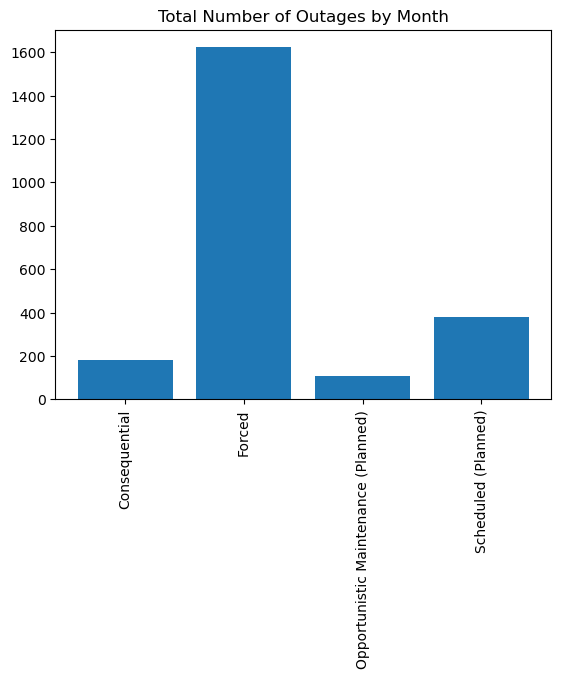

In [30]:
plt.bar(dataframe["Outage_Reason"], dataframe["Total_Number_Outages"])
plt.xticks(rotation = 90)
plt.title('Total Number of Outages by Participant Code')
#Forced outages are the leading reason for outages 

Now how about examining some monthly trends? Do we note any behaviours across the months that indicate certain months having more reliability issues over other months? 


<h3 style="color:#D4AF37"> Question Two </h3>



<b> i) Write a SQL Statement showing the `Total` of all Outage Types (Forced, Consequential, Scheduled, Opportunistic) where the `Status = Approved`, that occurred for both 2016 and 2017, grouped by `Year` and `Month`.  per month (i.e. 1 – 12). Order by `Year`, `Month`, `Total_Number_Outages` in Descending Order.


ii) Building on the query you write in i), group the results by `Outage Type`, `Year` and `Month`. This is so you can identify whether there is any outage type specifically increasing on a monthly basis when comparing 2016 to 2017. </b>


<b>⚠️Hint: You might find it helpful to create a small Common Table Expression to address these two questions! </b>

<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [304]:
%%sql
SELECT 
COUNT(*) as Total_Number_Outages,
Year, Month
From AEMR_Outage_Table
WHERE Status = 'Approved'
AND Year = 2016
GROUP BY Year, Month
LIMIT 12

 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Year,Month
191,2016,1
227,2016,2
136,2016,3
134,2016,4
174,2016,5
168,2016,6
147,2016,7
194,2016,8
124,2016,9
124,2016,10


In [305]:
Q2= _
print(Q2)
dataframe = pd.DataFrame(Q2, columns=['Total_Number_Outages','Year','Month'])
print(dataframe)
dataframe.to_csv("Q2.csv")

+----------------------+------+-------+
| Total_Number_Outages | Year | Month |
+----------------------+------+-------+
|         191          | 2016 |   1   |
|         227          | 2016 |   2   |
|         136          | 2016 |   3   |
|         134          | 2016 |   4   |
|         174          | 2016 |   5   |
|         168          | 2016 |   6   |
|         147          | 2016 |   7   |
|         194          | 2016 |   8   |
|         124          | 2016 |   9   |
|         124          | 2016 |   10  |
|         200          | 2016 |   11  |
|         112          | 2016 |   12  |
+----------------------+------+-------+
    Total_Number_Outages  Year  Month
0                    191  2016      1
1                    227  2016      2
2                    136  2016      3
3                    134  2016      4
4                    174  2016      5
5                    168  2016      6
6                    147  2016      7
7                    194  2016      8
8                 

Text(0, 0.5, 'Total Number of Outages')

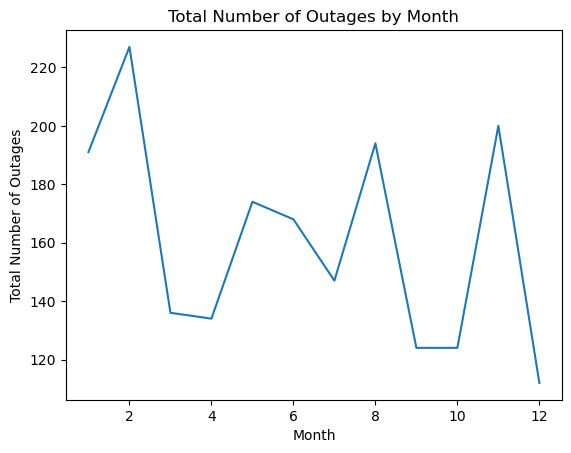

In [306]:
x = dataframe['Month']
y = dataframe['Total_Number_Outages']
fig, ax = plt.subplots() #plt.plot returns two values and is a Tuple
plt.plot(x, y)
plt.title('Total Number of Outages by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Outages')
#February has the most outages out of every month and September and October have the least.

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Year,Month,Total_Number_Outages
2016,1,191
2016,2,227
2016,3,136
2016,4,134
2016,5,174


Hmm. Interesting. We've now identified a specific outage type is rapidly increasing from 2016 to 2017. However, frequency is just one aspect we care about. We also care about the <b> `duration` </b> of our ouatges.

In other words, if an outage is very short, we aren't as concerned. However, if the outage is very long, this then has the risk of threatening our energy supplies. We want to identify the problematic energy providers here. This leads us to our next question below. 

<h3 style="color:#D4AF37"> Question Three </h3>


<b>Write a SQL statement that calculates 1) The `Total_Number_Outage_Events` and 2) The <b> `Average Duration`</b> in <u>DAYS</u> for each `Participant Code` and `Outage Type` over the 2016 and 2017 Period where the `Status = Approved`. 
Order by `Total_Number_Outage_Events` in Descending Order, `Reason` and `Year`.
    
Please note the average duration in days should be rounded to 2 decimal places for ease of comparison. When calculating the average duration, please note that you'll need to use the following fields:

`Start_Time` and `End_Time`. </b>

<b>⚠️ Hint:</b> If you're not sure how to calculate the difference between the `start_time` and `end_time` , reference this link <a href ="https://learnsql.com/cookbook/how-to-calculate-the-difference-between-two-timestamps-in-sqlite/"> here </a>

We've included an example below of how you could use the `JULIANDAY()` function! Remember, the `JULIANDAY()` function returns the results in days, including the fractional component. Some of the date(s) are flipped in the dataset, so you'll need to use the ABS() function to ensure you don't return any negative values!

~~~sql
%%sql

SELECT
        AVG((ABS(JULIANDAY(Date_2) - JULIANDAY(Date1))) 
FROM Some_Database
~~~



<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [17]:
%%sql
SELECT ROUND(AVG(ABS(JULIANDAY(Start_Time) - JULIANDAY(End_Time))),2) AS Average_Duration_In_Days,
COUNT (*)  AS Total_Number_Outages,
Outage_Reason, Year, Participant_Code
From AEMR_Outage_Table
WHERE Status = 'Approved' AND Outage_Reason = 'Forced' 
GROUP BY Participant_Code
ORDER BY Total_Number_Outages DESC, Outage_Reason, Year
LIMIT 10

 * sqlite:///AEMR.db
Done.


Average_Duration_In_Days,Total_Number_Outages,Outage_Reason,Year,Participant_Code
0.07,698,Forced,2017,AURICON
0.66,544,Forced,2017,GW
1.6,334,Forced,2017,MELK
0.06,326,Forced,2017,AUXC
0.36,237,Forced,2017,TRMOS
0.35,159,Forced,2017,PUG
1.04,153,Forced,2017,PJRH
0.87,129,Forced,2017,KORL
0.33,109,Forced,2017,PMC
1.28,74,Forced,2017,COLLGAR


In [18]:
Q3= _
print(Q3)
dataframe = pd.DataFrame(Q3, columns=['Average_Duration_In_Days','Total_Number_Outages','Outage_Reason', 'Year', 'Participant_Code'])
dataframe.to_csv("Q3.csv")

+--------------------------+----------------------+---------------+------+------------------+
| Average_Duration_In_Days | Total_Number_Outages | Outage_Reason | Year | Participant_Code |
+--------------------------+----------------------+---------------+------+------------------+
|           0.07           |         698          |     Forced    | 2017 |     AURICON      |
|           0.66           |         544          |     Forced    | 2017 |        GW        |
|           1.6            |         334          |     Forced    | 2017 |       MELK       |
|           0.06           |         326          |     Forced    | 2017 |       AUXC       |
|           0.36           |         237          |     Forced    | 2017 |      TRMOS       |
|           0.35           |         159          |     Forced    | 2017 |       PUG        |
|           1.04           |         153          |     Forced    | 2017 |       PJRH       |
|           0.87           |         129          |     Forc

Text(0.5, 1.0, 'Total Number of Outages by Participant Code')

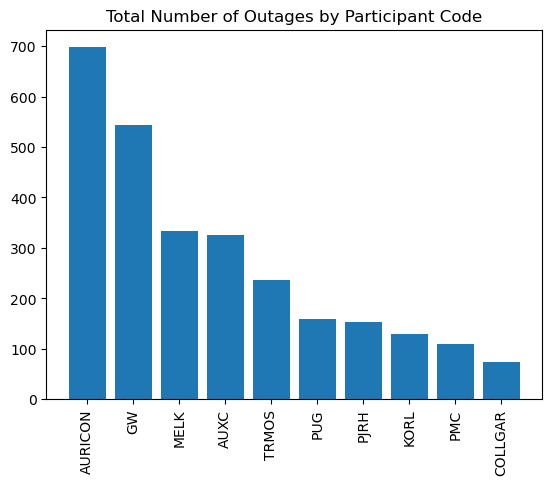

In [22]:
plt.bar(dataframe["Participant_Code"], dataframe["Total_Number_Outages"])
plt.xticks(rotation = 90)
plt.title('Total Number of Outages by Participant Code')
#The participant code AURICON has the leading number of outages and COLLGAR has the least. 

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Participant_Code,Outage_Reason,Year,Total_Number_Outage_Events,Average_Outage_Duration_In_Days
AURICON,Forced,2017,490,0.07
GW,Forced,2016,317,0.38
GW,Forced,2017,227,1.06
AURICON,Forced,2016,208,0.07
AUXC,Forced,2016,206,0.08


Now we're getting somewhere...!
We've identified participants who are having many outages, as well as participants who have been offline for the longest durations.

Armed with this information, it's important we're able to classify our participants accordingly based on reliability metrics of uptime.

We classify a participant based off the following criteria:
<b>
<li> High Risk - On average, the participant is unavailable for > 24 Hours (1 Day)</li>
<li> Medium Risk - On average, the participant is unavailable between 12 and 24 Hours </li>
<li> Low Risk - On average, the participant is unavailable for less than 12 Hours</li> 
</b>

<h3 style="color:#D4AF37"> Question Four </h3>

<b> Using the above criteria for context, write a SQL Statement that <u> classifies each participant code as either `High Risk`, `Medium Risk` or `Low Risk` in a column called `Risk_Classification`</u> that is based off their Average Outage Duration Time. Please note that this is for all valid (i.e. `Where status = approved`) outage types (Forced, Consequential, Scheduled, Opportunistic) for <u>all</u> participant codes from 2016 to 2017. Order the results using `Average Duration Time In Days` in descending order. 

<b>⚠️Hint: Think about the CASE Statement and how you might use this to help you with your classification! This is a more challenging question so you'll need to think through this step by step. You might also find `CTEs` or `Sub Queries` helpful for you.</b>


<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [74]:
%%sql
WITH AVG_Duration_Table AS( 
SELECT ROUND(AVG(ABS(JULIANDAY(End_Time) - JULIANDAY(Start_Time))),2) AS AVG_Outage_Duration_In_Days,
COUNT (*)  AS Total_Number_Outages,
Outage_Reason, Year, Participant_Code
From AEMR_Outage_Table
WHERE Status = 'Approved' AND Year In (2016,2017)
GROUP BY Participant_Code, Outage_Reason, Year) 

SELECT Participant_Code, Outage_Reason, Year, Total_Number_Outages, AVG_Outage_Duration_In_Days,
CASE 
WHEN AVG_Outage_Duration_In_Days > 1.0 THEN 'High Risk'
WHEN AVG_Outage_Duration_In_Days < 1.0 AND AVG_Outage_Duration_In_Days > 0.5 THEN 'Medium Risk'
ELSE 'Low Risk' 
END AS Risk_Classification 

FROM AVG_Duration_Table 
    Group By Risk_Classification 
    ORDER By Outage_Reason, Year, AVG_Outage_Duration_In_Days ASC 
    LIMIT 10


 * sqlite:///AEMR.db
Done.


Participant_Code,Outage_Reason,Year,Total_Number_Outages,AVG_Outage_Duration_In_Days,Risk_Classification
AURICON,Consequential,2016,41,0.13,Low Risk
AUXC,Consequential,2016,1,0.96,Medium Risk
AURICON,Scheduled (Planned),2016,46,1.89,High Risk


In [75]:
Q4= _
print(dataframe)
dataframe = pd.DataFrame(Q4, columns=['Participant_Code','Outage_Reason','Year', 'Total_Number_Outages', 'AVG_Outage_Duration_In_Days', 'Risk_Classification'])
dataframe.to_csv("Q4.csv")

  Outage_Reason Total_Number_Outages  Risk_Classification  Participant_Code  \
0       AURICON        Consequential                 2016                41   
1          AUXC        Consequential                 2016                 1   
2       AURICON  Scheduled (Planned)                 2016                46   

   Year AVG_Outage_Duration_In_Days  
0  0.13                    Low Risk  
1  0.96                 Medium Risk  
2  1.89                   High Risk  


Text(0.5, 1.0, 'Total Number of Outages by Participant Code')

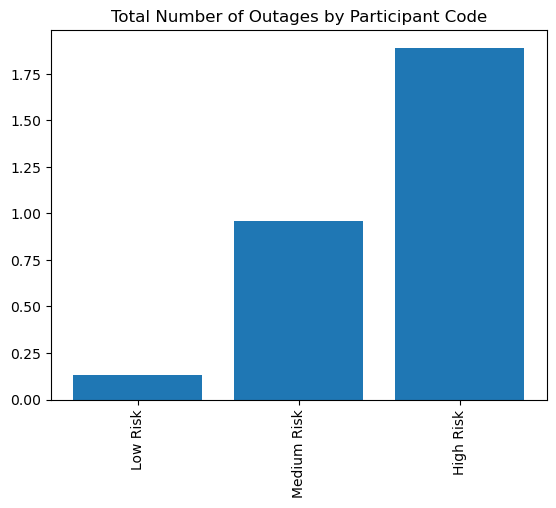

In [77]:
plt.bar(dataframe["Risk_Classification"], dataframe["AVG_Outage_Duration_In_Days"])
plt.xticks(rotation = 90)
plt.title('Avg Outage Duration in days by Risk Classification')
#This shows that outages that are High Risk last aprox 1.75 days on average while low risk last less than .25 a day. 

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Participant_Code,Outage_Reason,Year,Total_Number_Outage_Events,Average_Outage_Duration_In_Days,Risk_Classification
AURICON,Forced,2017,490,0.07,Low Risk
GW,Forced,2016,317,0.38,Low Risk
GW,Forced,2017,227,1.06,High Risk


Now that we've classified our participants as either `High Risk`, `Medium Risk` or `Low Risk`, we want to dig a little deeper.

Does it make sense that `Consequential`, `Opportunistic` or `Planned` aren't considered regarding the Risk Category?

Perhaps we should refine our category accordingly by ensuring we focus our Risk Category on labelling only `Forced` Outages as being a Risk. After all, Forced Outages are the unplanned outages that risk the security of the electricity grid.

Let's add two additional criteria to our classification considering `Total Number of Outage Events` and `Outage Type`.

We've summarised these below:

<b>
<li> High Risk - On average, the participant is unavailable for > 24 Hours (1 Day) OR the Total Number of Outage Events > 20 </li>
<li> Medium Risk - On average, the participant is unavailable between 12 and 24 Hours OR the Total Number of Outage Events is Between 10 and 20 </li>
<li> Low Risk - On average, the participant is unavailable for less than 12 Hours OR the Total Number of Outage Events < 10 </li> 
<li> If Outage Type is not forced, then N/A
</b>


<h3 style="color:#D4AF37"> Question Five </h3>

<b> Just as you did in Question Four, Using the above criteria for context, write a SQL Statement that <u> classifies each participant code as either `High Risk`, `Medium Risk` or `Low Risk` in a column called `Risk_Classification`</u> using the new classification criteria. Order the results using `Average Duration Time In Days` in descending order. 

<b>⚠️Hint: Think about the CASE Statement and how you might use this to help you with your classification! </b>


<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [6]:
%%sql
SELECT 
    Participant_Code, 
    Outage_Reason, 
    Year, 
    COUNT(*) AS Total_Number_Outage_Events, 
    ROUND(AVG(julianday(End_Time) - julianday(Start_Time)),2) AS Average_Outage_Duration_in_Days,
    CASE
    WHEN AVG(julianday(End_Time) - julianday(Start_Time)) <= 0.5 THEN 'Low Risk'
    --WHEN AVG(julianday(End_Time) - julianday(Start_Time)) > 0.5 AND <= 1 THEN 'Medium Risk'
    WHEN AVG(julianday(End_Time) - julianday(Start_Time)) > 1 THEN 'High Risk'
    ELSE 'N/A'
    END AS Risk_Classification 

From AEMR_Outage_Table
--WHERE 
    --Status = 'Approved' AND Year BETWEEN 2016 AND 2017 AND 
    --('Scheduled (planned)') 'Opportunistic Maintenance (Planned)')
GROUP BY
    Participant_Code, Outage_Reason, Year
ORDER BY
    Average_Outage_Duration_in_Days DESC 


 * sqlite:///AEMR.db
Done.


Participant_Code,Outage_Reason,Year,Total_Number_Outage_Events,Average_Outage_Duration_in_Days,Risk_Classification
WGUTD,Scheduled (Planned),2017,4,10.96,High Risk
AUXC,Scheduled (Planned),2017,3,7.72,High Risk
TRMOS,Scheduled (Planned),2017,5,3.4,High Risk
PUG,Scheduled (Planned),2017,14,3.15,High Risk
KORL,Consequential,2017,6,2.24,High Risk
MELK,Scheduled (Planned),2017,115,2.18,High Risk
PMC,Scheduled (Planned),2017,19,2.1,High Risk
PJRH,Scheduled (Planned),2017,43,2.09,High Risk
PJRH,Scheduled (Planned),2016,48,2.03,High Risk
WGUTD,Consequential,2016,6,1.99,High Risk


In [13]:
Q5= _
dataframe = pd.DataFrame(Q5, columns=['Participant_Code','Outage_Reason','Year', 'Total_Number_Outage_Events', 'Average_Outage_Duration_in_Days', 'Risk_Classification'])
dataframe.to_csv("Q5.csv")
print(dataframe)

    Participant_Code        Outage_Reason  Year  Total_Number_Outage_Events  \
0              WGUTD  Scheduled (Planned)  2017                           4   
1               AUXC  Scheduled (Planned)  2017                           3   
2              TRMOS  Scheduled (Planned)  2017                           5   
3                PUG  Scheduled (Planned)  2017                          14   
4               KORL        Consequential  2017                           6   
..               ...                  ...   ...                         ...   
110             KORL  Scheduled (Planned)  2017                          20   
111             ENRG  Scheduled (Planned)  2016                          36   
112              PMC        Consequential  2017                           8   
113            WGUTD               Forced  2017                           8   
114             AUXC  Scheduled (Planned)  2016                           3   

     Average_Outage_Duration_in_Days Risk_Classific

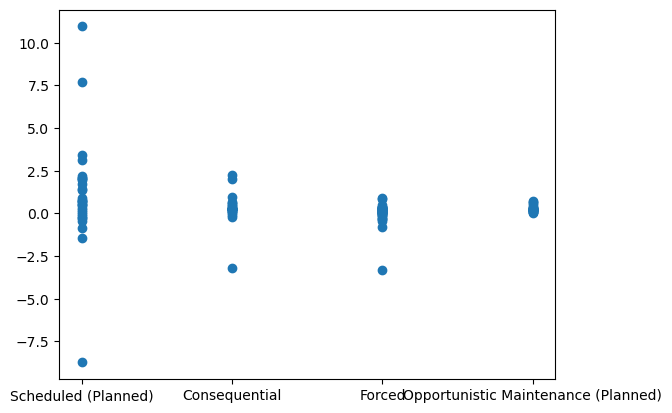

In [15]:
x = dataframe['Outage_Reason']
y = dataframe['Average_Outage_Duration_in_Days']
plt.scatter(x, y)
plt.show()

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>

<h3 style="color:#D4AF37"> ⚡ Part II. Energy Losses & Market Reliability ⚡ </h3>

When an energy provider provides energy to the market, they are making a commitment to the market and saying; “We will supply X amount of energy to the market under a contractual obligation.” However, in a situation where the outages are Forced, the energy provider intended to provide energy but are unable to provide energy and are forced offline. <b style="color:Maroon">If many energy providers are forced offline at the same time it could cause an energy security risk that AEMR needs to mitigate. </b>

To ensure this doesn’t happen, the AEMR is interested in exploring the following questions:

<li> Of the outage types in 2016 and 2017, what percent were Forced Outage(s)?
<li> What was the average duration for a forced outage during both 2016 and 2017? Have we seen an increase in the average duration of forced outages?
<li> Which energy providers tended to have the largest number of forced outages?
    
<p>

<b> We'll examine this in the questions below. </b>
    
<img src = "https://media.istockphoto.com/id/1281821795/photo/market-stock-graph-and-information-with-city-light-and-electricity-and-energy-facility-banner.jpg?s=612x612&w=0&k=20&c=RSN5LqeMW28HW10aA190_DWR5YJ5tG2wixHFPBV3uZE=">

<h3 style="color:#D4AF37"> Question Six </h3>

<b> Write a SQL Statement to calculate the proportion of Forced Outages that have occurred over the 2016 - 2017 Period.
Do we observe any particular increases regarding any Outage Types over this period? </b>

<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [49]:
%%sql
SELECT COUNT(*) as Total_Number_Outages, year,
SUM(CASE WHEN Outage_Reason = 'Forced' Then 1 ELSE 0 END) as Total_Number_Forced_Outage_Events, 
ROUND(SUM(CASE WHEN Outage_Reason = 'Forced' Then 1 ELSE 0 END) *1.0/COUNT(*)*100) AS Total_Number_Forced_Outage_PCT
FROM AEMR_Outage_Table
WHERE Status = 'Approved' and Year in (2016,2017)
GROUP BY Year
ORDER BY Total_Number_Outages ASC, Year

 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Year,Total_Number_Forced_Outage_Events,Total_Number_Forced_Outage_PCT
1931,2016,1264,65.0
2171,2017,1622,75.0


In [50]:
Q7= _
dataframe = pd.DataFrame(Q7, columns=['Total_Number_Outages', 'Year', 'Total_Number_Forced_Outage_Events','Total_Number_Forced_Outage_PCT'])
dataframe.to_csv("Q7.csv")
print(dataframe)

   Total_Number_Outages  Year  Total_Number_Forced_Outage_Events  \
0                  1931  2016                               1264   
1                  2171  2017                               1622   

   Total_Number_Forced_Outage_PCT  
0                            65.0  
1                            75.0  


In [99]:
x = [2016, 2017] 
y = dataframe['Total_Number_Forced_Outage_PCT']
plt.bar(x, y)
plt.title('PCT Forced Outage by Year')
ax.set_xlabel('Year')
ax.set_ylabel('PCT Forced Outage')

KeyError: 'Total_Number_Forced_Outage_PCT'

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Total_Number_Forced_Outage_Events,Pct_Outage_Forced
1931,1264,65.46
2171,1622,74.71


Great. It's clear to see now that `Forced Outages` are problematic for us. Not only are they the only outage type that generates financial losses as the Outage is unplanned, it seems there is a number of Energy Participants who have been having a significantly high number of Outages.

Now what can we do about this? 

Let's break our analysis down into Macro and Micro Analysis.
The total gives us the Overall Duration a participant is offline / has lost energy, however, it doesn't tell us how *frequently* this occurs. In other words, if we have one or two very big outages, it might contribute to very large totals.

However, perhaps an <b> average </b> can help us identify how big these Outages might really be, spread across the year!

Let's take a look.

<h3 style="color:#D4AF37"> Question Seven </h3>

Write a SQL Statement to calculate the `Total Number of Outages`, `Total Duration In Days`and `Total Energy Lost` of all valid `Outages` for each `participant code` and `facility_code`, sorted by `Total Energy Lost` in descending order and Ordered by the YEAR Category. 
    

<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [100]:
%%sql
SELECT COUNT(*) as Total_Number_Outages, Participant_Code,
SUM(CASE WHEN Outage_Reason = 'Forced' Then 1 ELSE 0 END) as Total_Number_Forced_Outage_Events, 
ROUND(SUM(CASE WHEN Outage_Reason = 'Forced' Then 1 ELSE 0 END) *1.0/COUNT(*)*100) AS Total_Number_Forced_Outage_PCT,
ROUND (AVG(ABS(JULIANDAY(Start_Time) - JULIANDAY(End_Time))),2) AS Average_Duration_In_Days
FROM AEMR_Outage_Table
WHERE Status = 'Approved' and Year in (2016,2017)
GROUP BY Year, Participant_Code
ORDER BY Total_Number_Outages ASC, Participant_Code

 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Participant_Code,Total_Number_Forced_Outage_Events,Total_Number_Forced_Outage_PCT,Average_Duration_In_Days
4,MCG,1,25.0,0.68
9,WGUTD,2,22.0,1.4
12,DNHR,1,8.0,0.29
12,WGUTD,8,67.0,3.19
13,DNHR,1,8.0,0.26
17,EUCT,3,18.0,0.27
18,MCG,12,67.0,0.23
28,EUCT,11,39.0,2.57
30,MUND,4,13.0,2.2
31,MUND,15,48.0,0.54


In [101]:
Q7= _
dataframe = pd.DataFrame(Q7, columns=['Total_Number_Outages', 'Participant_Code', 'Total_Number_Forced_Outage_Events','Total_Number_Forced_Outage_PCT','Average_Duration_In_Days'])
dataframe.to_csv("Q7.csv")
print(dataframe)

    Total_Number_Outages Participant_Code  Total_Number_Forced_Outage_Events  \
0                      4              MCG                                  1   
1                      9            WGUTD                                  2   
2                     12             DNHR                                  1   
3                     12            WGUTD                                  8   
4                     13             DNHR                                  1   
5                     17             EUCT                                  3   
6                     18              MCG                                 12   
7                     28             EUCT                                 11   
8                     30             MUND                                  4   
9                     31             MUND                                 15   
10                    35         STHRNCRS                                 13   
11                    35         STHRNCR

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'MCG'),
  Text(1, 0, 'WGUTD'),
  Text(2, 0, 'DNHR'),
  Text(3, 0, 'EUCT'),
  Text(4, 0, 'MUND'),
  Text(5, 0, 'STHRNCRS'),
  Text(6, 0, 'PUG'),
  Text(7, 0, 'COLLGAR'),
  Text(8, 0, 'ENRG'),
  Text(9, 0, 'TSLA_MGT'),
  Text(10, 0, 'PMC'),
  Text(11, 0, 'TRMOS'),
  Text(12, 0, 'KORL'),
  Text(13, 0, 'AUXC'),
  Text(14, 0, 'PJRH'),
  Text(15, 0, 'MELK'),
  Text(16, 0, 'GW'),
  Text(17, 0, 'AURICON')])

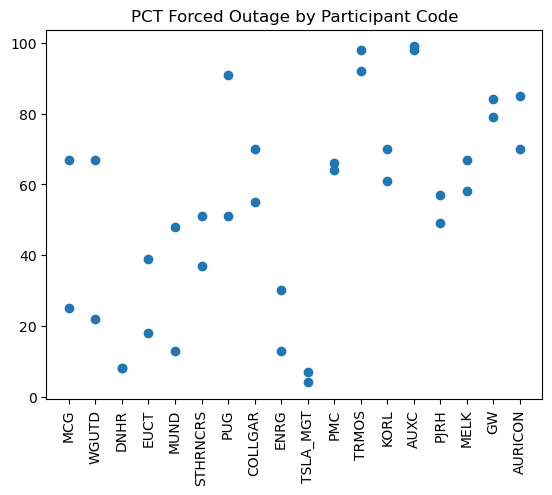

In [103]:
x = dataframe['Participant_Code']
y = dataframe['Total_Number_Forced_Outage_PCT']
plt.scatter(x, y)
plt.title('PCT Forced Outage by Participant Code')
ax.set_xlabel('Year')
ax.set_ylabel('PCT Forced Outage')
plt.xticks(rotation = 90)

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Total_Number_Outages,Total_Duration_In_Days,Total_Energy_Lost,Outage_Reason,Participant_Code,Facility_Code,Year
70,482.58,7499.28,Scheduled (Planned),MELK,MELK_G7,2017
177,404.15,10285.4,Forced,MELK,MELK_G7,2017
85,392.25,9668.79,Scheduled (Planned),MELK,MELK_G7,2016
227,240.69,19326.56,Forced,GW,BW1_GREENWATERS_G2,2017
45,199.4,6450.0,Scheduled (Planned),GW,BW1_GREENWATERS_G2,2016


<h3 style="color:#D4AF37"> Question Eight </h3>

<b> Write a SQL Statement to calculate the `Average Duration In Days`and `Average Energy Lost` of all valid `FORCED OUTAGES` for each `participant code` and `facility_code` sorted by `Average Energy Lost` in descending order and Ordered by the YEAR Category. 


<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [77]:
%%sql
SELECT 
ROUND (AVG(ABS(JULIANDAY(Start_Time) - JULIANDAY(End_Time))),2) AS Average_Duration_In_Days,
ROUND (AVG(Energy_Lost_MW),2) AS AVG_Energy_Lost, 
Outage_Reason, Participant_Code, Facility_Code, Year 
FROM AEMR_Outage_Table
WHERE Status = 'Approved' AND Outage_Reason = 'Forced' AND Year In (2016,2017)
GROUP BY Participant_Code, Facility_Code, Year
ORDER BY Avg_Energy_Lost DESC, Year, Facility_Code LIMIT 10

 * sqlite:///AEMR.db
Done.


Average_Duration_In_Days,AVG_Energy_Lost,Outage_Reason,Participant_Code,Facility_Code,Year
1.11,149.0,Forced,COLLGAR,COLLGAR_WF1,2016
0.04,141.21,Forced,PMC,PMC_AG,2017
0.49,131.78,Forced,PMC,PMC_AG,2016
0.83,87.71,Forced,MELK,MELK_G7,2016
1.06,85.14,Forced,GW,BW1_GREENWATERS_G2,2017
0.25,80.0,Forced,TSLA_MGT,TESLA_PICTON_G1,2016
0.38,76.23,Forced,KORL,KORL_GT3,2016
1.22,72.61,Forced,PJRH,PJRH_GT11,2016
0.84,67.21,Forced,PJRH,PJRH_GT11,2017
1.38,61.93,Forced,COLLGAR,COLLGAR_WF1,2017


In [78]:
Q8= _
dataframe = pd.DataFrame(Q8, columns=['Average_Duration_In_Days','AVG_Energy_Lost','Outage_Reason','Participant_Code','Facility_Code','Year'])
dataframe.to_csv("Q8.csv")
print(dataframe)

   Average_Duration_In_Days  AVG_Energy_Lost Outage_Reason Participant_Code  \
0                      1.11           149.00        Forced          COLLGAR   
1                      0.04           141.21        Forced              PMC   
2                      0.49           131.78        Forced              PMC   
3                      0.83            87.71        Forced             MELK   
4                      1.06            85.14        Forced               GW   
5                      0.25            80.00        Forced         TSLA_MGT   
6                      0.38            76.23        Forced             KORL   
7                      1.22            72.61        Forced             PJRH   
8                      0.84            67.21        Forced             PJRH   
9                      1.38            61.93        Forced          COLLGAR   

        Facility_Code  Year  
0         COLLGAR_WF1  2016  
1              PMC_AG  2017  
2              PMC_AG  2016  
3         

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'COLLGAR_WF1'),
  Text(1, 0, 'PMC_AG'),
  Text(2, 0, 'MELK_G7'),
  Text(3, 0, 'BW1_GREENWATERS_G2'),
  Text(4, 0, 'TESLA_PICTON_G1'),
  Text(5, 0, 'KORL_GT3'),
  Text(6, 0, 'PJRH_GT11')])

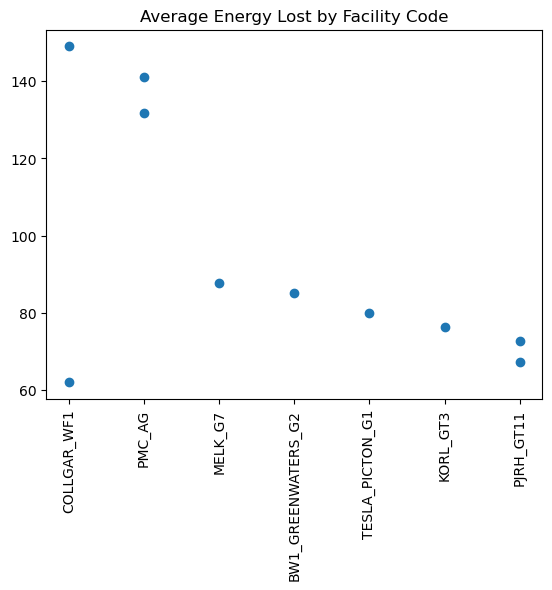

In [82]:
x = dataframe['Facility_Code']
y = dataframe['AVG_Energy_Lost']
plt.scatter(x, y)
plt.title('Average Energy Lost by Facility Code')
ax.set_xlabel('Year')
ax.set_ylabel('PCT Forced Outage')
plt.xticks(rotation = 90)

 * sqlite:///AEMR.db
Done.


Avg_Duration_In_Days,Avg_Energy_Lost,Outage_Reason,Participant_Code,Facility_Code,Year
5.9,5.89,Forced,EUCT,GRASMERE_WF1,2016
3.44,27.66,Forced,WGUTD,WEST_KALGOORLIE_GT2,2017
2.28,58.11,Forced,MELK,MELK_G7,2017


<h3 style="color:#D4AF37"> Question Nine </h3>

<b> Write a SQL Statement to calculate the `Average Energy Lost` and `Total Energy Lost` for each `Facility Code` and `Participant Code` across both the 2016 and 2017 periods when the `Outage_Reason` is set to Forced. Upon completion of this, calculate the <u> percentage </u> of energy lost due to forced outages for each `Facility_Code`. Please ORDER the query by `Total Energy Lost` from 2016 to 2017.
    
From your analysis, which participants have contributed the most to the Energy Lost due to Forced Outages?


<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [91]:
%%sql
SELECT 
ROUND (AVG(Energy_Lost_MW),2) AS AVG_Energy_Lost, 
ROUND (SUM(Energy_Lost_MW),2) AS TTL_Energy_Lost,
Outage_Reason, Participant_Code, Facility_Code, Year 
FROM AEMR_Outage_Table
WHERE Status = 'Approved' AND Outage_Reason = 'Forced' AND Year In (2016,2017)
GROUP BY Participant_Code, Facility_Code, Year
ORDER BY Avg_Energy_Lost DESC, Year

 * sqlite:///AEMR.db
Done.


AVG_Energy_Lost,TTL_Energy_Lost,Outage_Reason,Participant_Code,Facility_Code,Year
149.0,4320.86,Forced,COLLGAR,COLLGAR_WF1,2016
141.21,5648.44,Forced,PMC,PMC_AG,2017
131.78,9093.09,Forced,PMC,PMC_AG,2016
87.71,13771.07,Forced,MELK,MELK_G7,2016
85.14,19326.56,Forced,GW,BW1_GREENWATERS_G2,2017
80.0,160.0,Forced,TSLA_MGT,TESLA_PICTON_G1,2016
76.23,4040.32,Forced,KORL,KORL_GT3,2016
72.61,5881.52,Forced,PJRH,PJRH_GT11,2016
67.21,4839.28,Forced,PJRH,PJRH_GT11,2017
61.93,2787.06,Forced,COLLGAR,COLLGAR_WF1,2017


In [92]:
Q9= _
dataframe = pd.DataFrame(Q9, columns=['AVG_Energy_Lost','TTL_Energy_Lost','Outage_Reason','Participant_Code','Facility_Code', 'Year'])
dataframe.to_csv("Q9.csv")
print(dataframe)

    AVG_Energy_Lost  TTL_Energy_Lost Outage_Reason Participant_Code  \
0            149.00          4320.86        Forced          COLLGAR   
1            141.21          5648.44        Forced              PMC   
2            131.78          9093.09        Forced              PMC   
3             87.71         13771.07        Forced             MELK   
4             85.14         19326.56        Forced               GW   
5             80.00           160.00        Forced         TSLA_MGT   
6             76.23          4040.32        Forced             KORL   
7             72.61          5881.52        Forced             PJRH   
8             67.21          4839.28        Forced             PJRH   
9             61.93          2787.06        Forced          COLLGAR   
10            61.57          4679.68        Forced             KORL   
11            58.11         10285.40        Forced             MELK   
12            56.32          1182.80        Forced             ENRG   
13    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'COLLGAR'),
  Text(1, 0, 'PMC'),
  Text(2, 0, 'MELK'),
  Text(3, 0, 'GW'),
  Text(4, 0, 'TSLA_MGT'),
  Text(5, 0, 'KORL'),
  Text(6, 0, 'PJRH'),
  Text(7, 0, 'ENRG'),
  Text(8, 0, 'MCG'),
  Text(9, 0, 'AURICON'),
  Text(10, 0, 'MUND'),
  Text(11, 0, 'PUG'),
  Text(12, 0, 'TRMOS'),
  Text(13, 0, 'WGUTD'),
  Text(14, 0, 'STHRNCRS'),
  Text(15, 0, 'EUCT'),
  Text(16, 0, 'AUXC'),
  Text(17, 0, 'DNHR')])

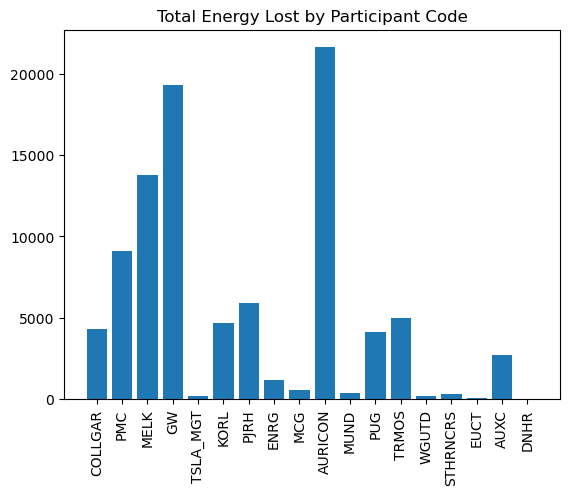

In [89]:
x = dataframe['Participant_Code']
y = dataframe['TTL_Energy_Lost']
plt.bar(x, y)
plt.title('Total Energy Lost by Participant Code')
ax.set_xlabel('Year')
ax.set_ylabel('PCT Forced Outage')
plt.xticks(rotation = 90)

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Avg_Energy_Lost,Total_Energy_Lost,Pct_Energy_Loss,Outage_Reason,Participant_Code,Facility_Code,Year
44.16,21639.55,14.21,Forced,AURICON,AURICON_PNJ_U1,2017
85.14,19326.56,12.69,Forced,GW,BW1_GREENWATERS_G2,2017
49.69,15751.38,10.34,Forced,GW,BW1_GREENWATERS_G2,2016


<h3 style="color:#D4AF37"> Question Ten </h3>

<b>Having identified the top 3 participants by Total Energy Loss being `GW`, `MELK` and `Auricon`; Write a SQL Statement calculating the `Total_Energy_Lost` each of these three `Participant_Codes` and the `Facility_Code`. Additionally, identify the `Description_Of_Outage` associated with the highest `Total_Energy_Lost` for each of the `Participant_Codes` and `Facility_Code` for each of the three participants. 
    
<u>Lastly, calculate the percentage of Energy Loss, attributed to these reasons!</u> </b>

<b> ⚠️ Hint: As this is the final question, this is a bit of a <b> challenge question </b> which will involve some SQL functions you're not familiar with just yet. In the workplace, you're going to have to grow familiar with googling and searching for functions that you may have not learned or be familiar with. In this question, to identify the TOP `Description_Of_Outage` reason for each Participant, you're going to need to use `PARTITION BY`. You can read all about the approach you can take in this example <a href = "https://learnsql.com/cookbook/how-to-rank-rows-within-a-partition-in-sql/#:~:text=To%20partition%20rows%20and%20rank,rank%20rows%20within%20a%20partition."> here </a>. Good luck! 

<h4 style="color:Teal"> Please write your SQL in the code window below </h4>

In [94]:
%%sql
SELECT
    Participant_Code, Facility_Code, Description_Of_Outage,
    ROUND(SUM(Energy_Lost_MW),2) AS Total_Energy_Lost,
    ROUND(SUM(Energy_Lost_MW)/(SELECT SUM(Energy_Lost_MW) FROM AEMR_Outage_Table WHERE Status = 'Approved' AND Outage_Reason = 'Forced') * 100,2) AS Pct_Energy_Loss,
    RANK() OVER (PARTITION BY Participant_Code ORDER BY Description_Of_Outage DESC) AS rank
FROM AEMR_Outage_Table
WHERE Status = 'Approved' AND Outage_Reason = 'Forced'
GROUP BY Participant_Code, Facility_Code
ORDER BY Total_Energy_Lost DESC
LIMIT 3;

 * sqlite:///AEMR.db
Done.


Participant_Code,Facility_Code,Description_Of_Outage,Total_Energy_Lost,Pct_Energy_Loss,rank
GW,BW1_GREENWATERS_G2,Operational Issues caused real time forced outage.,35077.94,23.03,1
AURICON,AURICON_PNJ_U1,Under generation - ambient conditions,32335.82,21.23,1
MELK,MELK_G7,Boiler feedpump capacity,24056.47,15.79,1


In [95]:
Q10= _
dataframe = pd.DataFrame(Q10, columns=['Participant_Code','Facility_Code','Description_Of_Outage','Total_Energy_Lost','Pct_Energy_Loss','rank'])
dataframe.to_csv("Q10.csv")
print(dataframe)

  Participant_Code       Facility_Code  \
0               GW  BW1_GREENWATERS_G2   
1          AURICON      AURICON_PNJ_U1   
2             MELK             MELK_G7   

                               Description_Of_Outage  Total_Energy_Lost  \
0  Operational Issues caused real time forced out...           35077.94   
1              Under generation - ambient conditions           32335.82   
2                           Boiler feedpump capacity           24056.47   

   Pct_Energy_Loss  rank  
0            23.03     1  
1            21.23     1  
2            15.79     1  


([0, 1, 2],
 [Text(0, 0, 'Operational Issues caused real time forced outage.'),
  Text(1, 0, 'Under generation - ambient conditions'),
  Text(2, 0, 'Boiler feedpump capacity')])

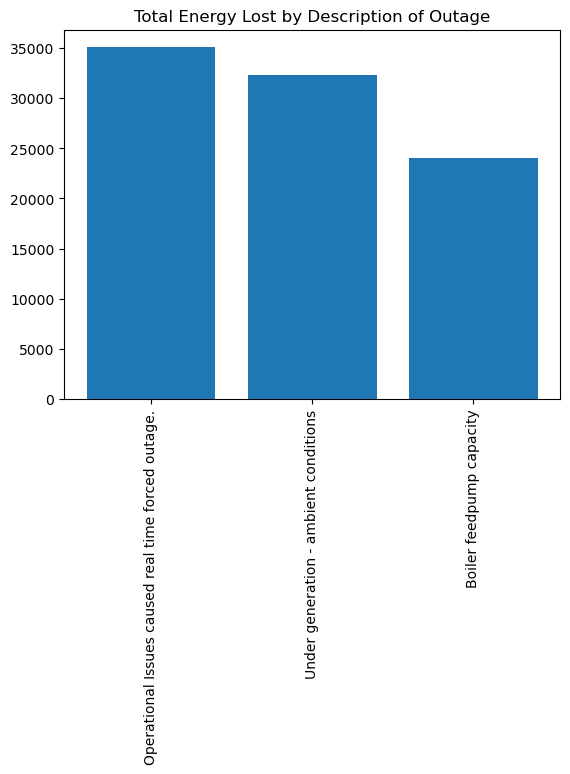

In [96]:
x = dataframe['Description_Of_Outage']
y = dataframe['Total_Energy_Lost']
plt.bar(x, y)
plt.title('Total Energy Lost by Description of Outage')
ax.set_xlabel('Year')
ax.set_ylabel('PCT Forced Outage')
plt.xticks(rotation = 90)

<h3 style = "color:#5D3FD3"> Expected Output (Sample) </h3>


 * sqlite:///AEMR.db
Done.


Participant_Code,Facility_Code,Description_Of_Outage,Total_Energy_Lost,Pct_Energy_Loss,rank
AURICON,AURICON_PNJ_U1,Full unit trip,6033.87,3.96,1
GW,BW1_GREENWATERS_G2,Operational Issues caused real time forced outage.,28687.54,18.84,1
MELK,MELK_G7,Safety Issues,1100.0,0.72,1


Well done! That's a Wrap! We've now analyzed all the data we need to answer Management's Question.
You'll now move to the next part of your analysis where you'll be proceeding with creating your story in Tableau using the insights you've gathered from your SQL Analysis! 

Let's now switch to Part II of our Analysis in Tableau!!

<img src = https://www.energymagazine.com.au/wp-content/uploads/2021/05/shutterstock_1888482466-e1620278098312.jpg>


## Appendix: SQL Cheat Sheet

**SELECT**

```SQL
- SELECT * FROM table_name -- Select all columns from a table
- SELECT column_name(s) FROM table_name -- Select some columns from a table
- SELECT DISTINCT column_name(s) FROM table_name -- Select only the different values
- SELECT column_name(s) FROM table_name -- Select data filtered with the WHERE clause
  WHERE condition
- SELECT column_name(s) FROM table_name -- Order data by multiple columns. DESC for descending 
  ORDER BY column_1, column_2 DESC, column_3 ASC -- and ASC (optional) for ascending order
```

**Operators**
- `<` - Less than
- `>` - Greater than
- `<=` - Less than or equal
- `>=` - Greater than or equal
- `<>` - Not equal
- `=` - Equal
- `BETWEEN v1 AND v2` - Between a specified range
- `LIKE` - Search pattern. Use `%` as a wildcard. E.g., `%o%` matches "o", "bob", "blob", etc.

**Aggregate Functions**
- `AVG(column)` - Returns the average value of a column
- `COUNT(column)` - Returns the number of rows (without a NULL value) of a column
- `MAX(column)` - Returns the maximum value of a column
- `MIN(column)` - Returns the minimum value of a column
- `SUM(column)` - Returns the sum of a column
```SQL
SELECT AVG(column_name), MIN(column_name), MAX(column_name) FROM table_name
```
 
**Miscellaneous**
- `CASE...END` - Used in `SELECT` queries to alter a variable in place. E.g.
```SQL
SELECT column_name
    CASE
        WHEN column_name >= 0 THEN 'POSITIVE'
        ELSE 'NEGATIVE'
    END
FROM table
```
- `AS` - Used to rename a variable. E.g.
```SQL
SELECT SUM(column_name) AS total_column_name FROM table_name
```
- `GROUP BY` - Used to group rows that share the same value(s) in particular column(s). It is mostly used along with aggregation functions
- `ORDER BY` - Determines the order in which the rows are returned by an SQL query